# ANN Regularization Techniques

## Dropout layer

**What Do Dropout Layers Do?**
During training, dropout randomly sets a fraction of the neurons (e.g., 20% or 50%) to zero at each update step. This means these neurons do not participate in forward propagation or backpropagation during that particular iteration. However, during inference (testing/prediction), all neurons are active, but their outputs are scaled down to match the expected activations.

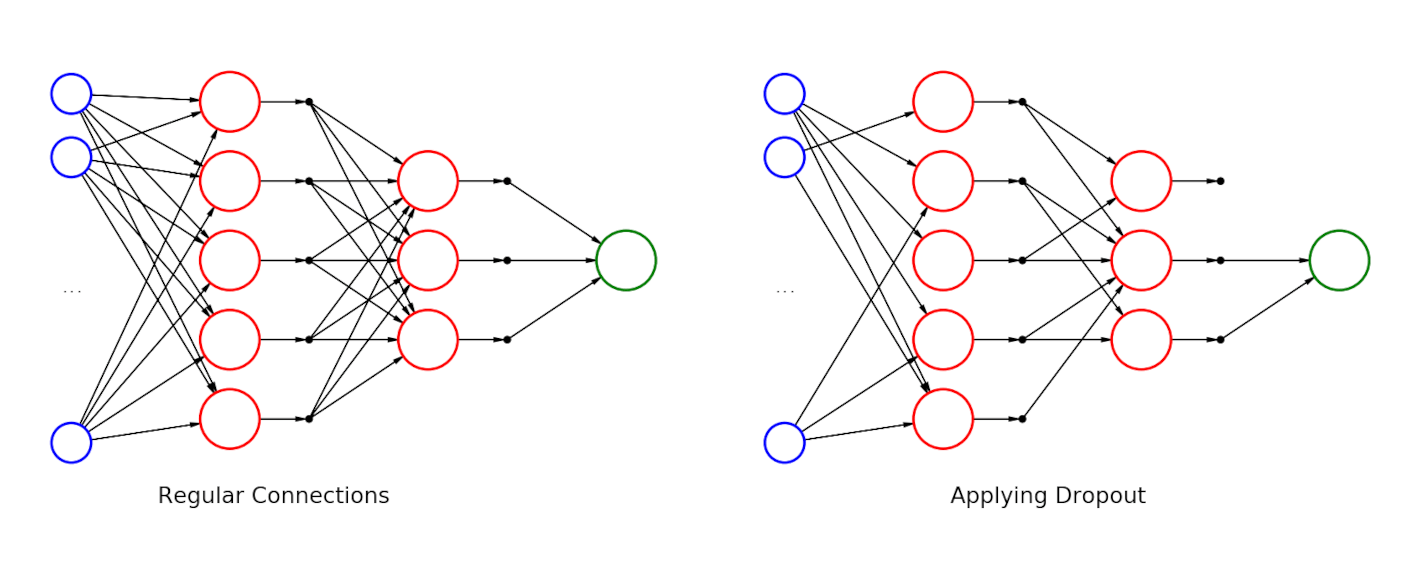

**Why Are Dropout Layers Useful?**
1. Prevents Overfitting

  Since dropout forces different parts of the network to learn independently, it prevents the model from memorizing training data and encourages it to learn more robust features.

2. Promotes Redundancy and Robust Learning

  By randomly "dropping" neurons, the model cannot rely on specific neurons and must distribute learning across the network, making it less sensitive to noise in the data.

3. Acts as a Form of Model Averaging

  Dropout can be seen as training multiple smaller networks within the same architecture. Since different subsets of neurons are active in each training step, the final trained network behaves like an ensemble of networks, improving its predictive performance.

4. Reduces Co-Adaptation

  Without dropout, some neurons may become overly dependent on certain other neurons. Dropout forces each neuron to function independently, making the network more adaptive and resilient.

## When and Where to Use Dropout?
**Hidden Layers of Fully Connected Networks:**
  
  * Usually applied after activation functions in deep layers to prevent co-adaptation among neurons.

**Convolutional Neural Networks (CNNs):**
  
  * Used in fully connected layers (not in convolutional layers, where batch normalization is preferred).

**Recurrent Neural Networks (RNNs, LSTMs, GRUs):**
  
  * Specialized variational dropout is used to ensure stability.

## Typical Dropout Rates
  * 0.2 to 0.5 in fully connected layers (e.g., 20%–50% neurons dropped).
  * Lower values (~0.2) in recurrent networks (LSTMs, GRUs) to avoid loss of sequential information.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),  # 30% dropout
    Dense(64, ),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer
])


## Batch Normalization (BatchNorm) Layers

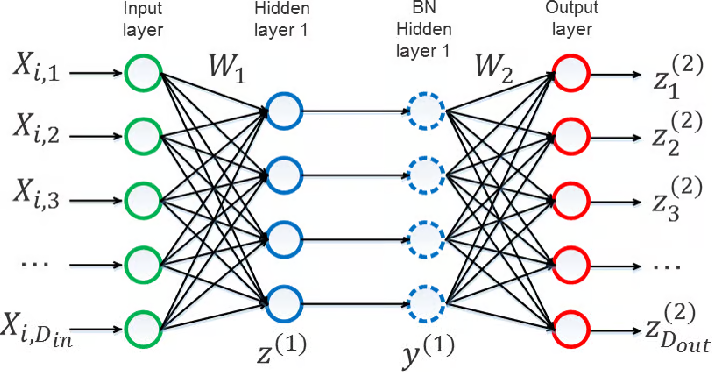

Batch Normalization (BatchNorm) is a regularization and optimization technique used in Artificial Neural Networks (ANNs) to improve training stability and speed by normalizing the inputs of each layer.

**Key Benefits of Batch Normalization**

1. Speeds Up Training

  BatchNorm reduces internal covariate shift, which means the distribution of activations remains stable throughout training. This allows the model to converge faster and often requires fewer epochs.

2. Reduces Dependence on Initialization

  Deep networks are highly sensitive to weight initialization. BatchNorm helps mitigate this dependency, making training more robust to different initialization strategies.

3. Enables Higher Learning Rates

  Since the activations are normalized, models can be trained with higher learning rates without the risk of divergence or instability.

4. Acts as a Regularizer (Reduces Overfitting)

  BatchNorm has a mild regularization effect, similar to dropout, because it introduces some noise during training. However, it does not replace dropout but can sometimes reduce the need for it.

5. Improves Gradient Flow

  By keeping activations well-scaled and centered, BatchNorm prevents vanishing/exploding gradients, improving backpropagation efficiency.

**Are Batch Normalization Layers Trainable?**

Yes, BatchNorm layers are trainable, meaning they learn two additional parameters:

  * $γ (Gamma)$: A learnable scaling parameter that allows the network to adjust the normalized values.

  * $β (Beta)$: A learnable shifting parameter that allows the network to recover representations lost due to normalization.

These parameters are updated during training along with the weights of the network.

**How Batch Normalization Works**

For each mini-batch during training:

Compute the mean and variance of the batch’s activations.

Normalize the activations:
$$
\hat{x} = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}}
$$
Scale and shift using the learned parameters γ and β:
$$
y = \gamma \hat{x}+\beta
$$


**Where to Use Batch Normalization?**
1. Fully Connected (Dense) Layers
  
  Apply before the activation function.

2. Convolutional Neural Networks (CNNs)
  
  Apply after the convolution and before the activation function.

3. Recurrent Neural Networks (RNNs, LSTMs, GRUs)
  
  Not commonly used in standard RNNs, but alternatives like LayerNorm are better suited.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation

model = Sequential([
    Dense(128),
    BatchNormalization(),  # Normalizes activations
    Activation('relu'),    # Activation comes after BatchNorm
    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dense(10, activation='softmax')  # Output layer
])


## Preferred Sequence of Layers in an Artificial Neural Network (ANN)

**Fully Connected (Dense) Networks**
1. Input Layer - Accepts input features.
2. Dense (Fully Connected) Layer - Linear transformation with weights.
3. Batch Normalization (Optional, if used) - Normalizes activations to stabilize training.
4. Activation Function - Introduces non-linearity (e.g., ReLU, Sigmoid, etc.).
5. Dropout (Optional, if used) - Randomly drops neurons to prevent overfitting.
6. Repeat Steps 2-5 for deeper layers.
7. Output Layer - Final prediction with an appropriate activation function (e.g., Softmax for classification, Linear for regression).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout

model = Sequential([
    Dense(128, input_shape=(784,)),  # Fully Connected Layer
    BatchNormalization(),            # Normalize activations
    Activation('relu'),               # Apply activation function
    Dropout(0.3),                     # Regularization

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),

    Dense(10, activation='softmax')   # Output layer for classification
])


**Convolutional Neural Networks (CNNs)**

1. Input Layer - Image or feature input.
2. Convolutional Layer (Conv2D/Conv3D) - Extracts features.
3. Batch Normalization (Optional, if used) - Stabilizes activations.
4. Activation Function - Typically ReLU.
5. Pooling Layer (MaxPooling/AveragePooling) - Reduces spatial dimensions.
6. Dropout (Optional, if used) - Prevents overfitting.
7. Repeat Steps 2-6 for deeper layers.
8. Flatten - Converts feature maps to a 1D vector.
9. Fully Connected (Dense) Layer - Processes final features.
10. Output Layer - Produces final predictions.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation, Dropout

model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(64,64,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # Output layer
])


**Recurrent Neural Networks (RNNs, LSTMs, GRUs)**

1. Input Layer – Sequences or time-series data.
2. Embedding Layer (For NLP models, if applicable) – Converts words to vector representations.
3. Recurrent Layer (LSTM/GRU) – Processes sequential data.
4. Dropout (Optional, if used) – Helps prevent overfitting.
5. Repeat Steps 3-4 for multiple RNN layers.
6. Dense Layer – Fully connected processing.
7. Output Layer – Generates predictions.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),  # Word embedding
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer
])


## General Rules for Layer Ordering

1. Batch Normalization should come before the activation function.
  * Helps normalize inputs, improving stability.
2. Dropout should come after activation functions.
  * Prevents overfitting by randomly deactivating neurons.
3. Pooling (in CNNs) should follow activation.
  * Reduces spatial dimensions while preserving information.
4. Flatten before Dense layers (in CNNs).
  * Converts feature maps into a 1D vector.
5. Use higher dropout rates (e.g., 0.5) for fully connected layers and lower (e.g., 0.2) for convolutional/RNN layers.
6. For deep networks, use batch normalization to improve training stability.